# Spaceship Titanic
https://www.kaggle.com/competitions/spaceship-titanic/data

Let's try to find a good model to predict who survives using best practices.

In [13]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('dataset/train.csv')

train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


=== MISSING DATA ANALYSIS ===
Columns with missing data: 12
CryoSleep: 217 (2.5%)
ShoppingMall: 208 (2.4%)
VIP: 203 (2.3%)
HomePlanet: 201 (2.3%)
Name: 200 (2.3%)
Cabin: 199 (2.3%)
VRDeck: 188 (2.2%)
FoodCourt: 183 (2.1%)
Spa: 183 (2.1%)
Destination: 182 (2.1%)
RoomService: 181 (2.1%)
Age: 179 (2.1%)


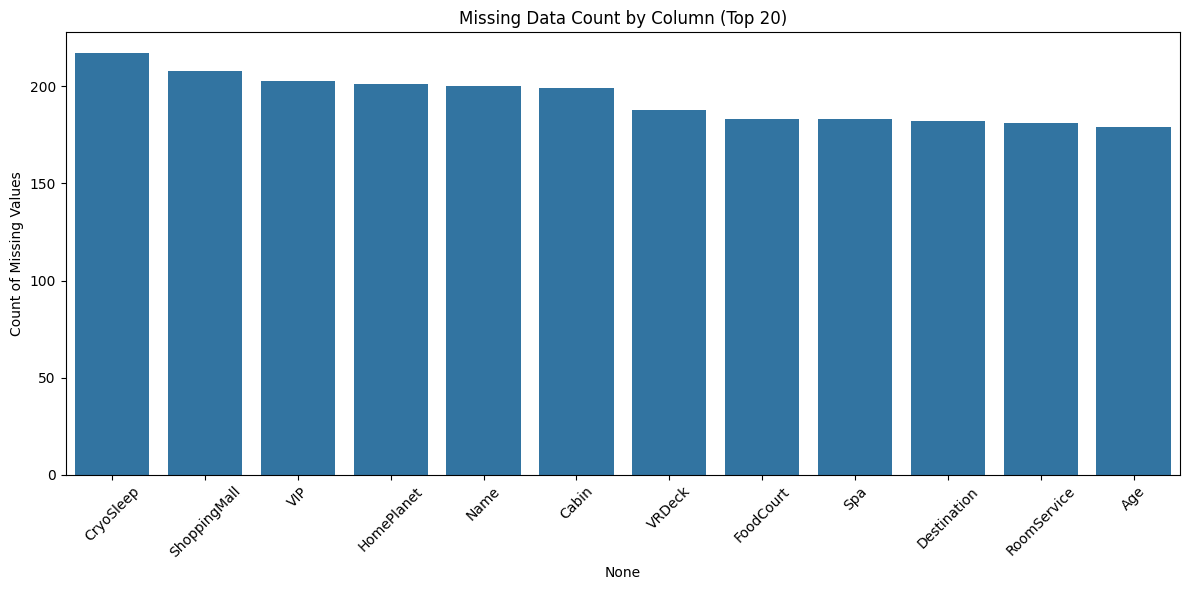

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Missing Data Analysis
print("=== MISSING DATA ANALYSIS ===")
missing_data = train_df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    print(f"Columns with missing data: {len(missing_data)}")
    for col, count in missing_data.items():
        percentage = (count / len(train_df)) * 100
        print(f"{col}: {count} ({percentage:.1f}%)")
    
    # Visualize missing data
    if len(missing_data) > 0:
        plt.figure(figsize=(12, 6))
        sns.barplot(x=missing_data.index, y=missing_data.head(20).values)
        plt.title('Missing Data Count by Column (Top 20)')
        plt.ylabel('Count of Missing Values')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("No missing data found!")

In [15]:
import seaborn as sns
# 5. Correlation Analysis - The Most Important for ML
print("=== CORRELATION ANALYSIS ===")

# Get correlations with target variable
numeric_df = train_df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['Transported'].sort_values(ascending=False)

print(correlations)

# Plot correlation heatmap for top features
top_features = correlations.head(16).index  # Top 15 + SalePrice itself
top_corr_matrix = numeric_df[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Top Features vs SalePrice')
plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===


KeyError: 'Transported'